In [1]:
    import numpy as np
import matplotlib.pyplot as plt
import os

Definimos la ruta donde se encuentran los datos de entrenamiento y de prueba

In [2]:
path = ("C:/kaggle/dataset_moviles")

In [3]:
path_train = path + "/train"
path_test = path + "/test"

In [4]:
os.listdir(path_train)

['millitary', 'other']

En cada carpeta hay dos subcarpetas donde "millitary" y "other" son las clases a clasificar

In [5]:
os.listdir(path_train + "/millitary")

['millitary_0_100.jpeg',
 'millitary_0_1002.jpeg',
 'millitary_0_1004.jpeg',
 'millitary_0_1005.jpeg',
 'millitary_0_1010.jpeg',
 'millitary_0_1012.jpeg',
 'millitary_0_1013.jpeg',
 'millitary_0_1015.jpeg',
 'millitary_0_1017.jpeg',
 'millitary_0_1019.jpeg',
 'millitary_0_102.jpeg',
 'millitary_0_1020.jpeg',
 'millitary_0_1022.jpeg',
 'millitary_0_1024.jpeg',
 'millitary_0_1025.jpeg',
 'millitary_0_1026.jpeg',
 'millitary_0_1027.jpeg',
 'millitary_0_1028.jpeg',
 'millitary_0_103.jpeg',
 'millitary_0_1032.jpeg',
 'millitary_0_1033.jpeg',
 'millitary_0_1034.jpeg',
 'millitary_0_1037.jpeg',
 'millitary_0_1038.jpeg',
 'millitary_0_104.jpeg',
 'millitary_0_1040.jpeg',
 'millitary_0_1041.jpeg',
 'millitary_0_1043.jpeg',
 'millitary_0_1046.jpeg',
 'millitary_0_1048.jpeg',
 'millitary_0_1051.jpeg',
 'millitary_0_1053.jpeg',
 'millitary_0_1054.jpeg',
 'millitary_0_1055.jpeg',
 'millitary_0_1056.jpeg',
 'millitary_0_1058.jpeg',
 'millitary_0_1059.jpeg',
 'millitary_0_106.jpeg',
 'millitary_0_106

Cada imagen tiene un tamaño de 256 x 256 pixeles

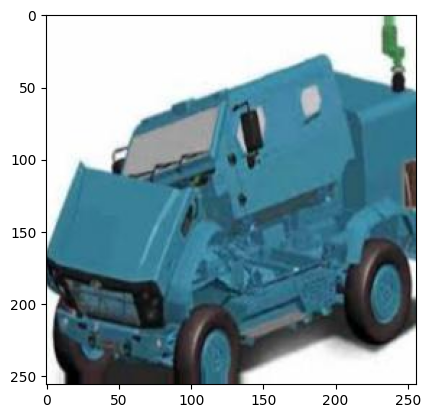

In [6]:
img = plt.imread(path_train + "/millitary/millitary_0_2.jpeg")
plt.imshow(img)
plt.show()

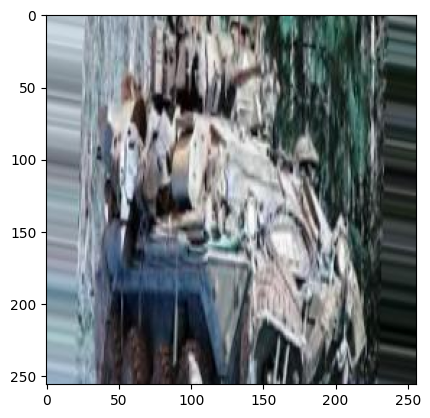

In [7]:
img = plt.imread(path_train + "/millitary/millitary_0_9999.jpeg")
plt.imshow(img)
plt.show()

Bien, la idea es contruir nuestro prerceptron desde 0 de manera que podamos clasificar las imagenes en dos clases: "millitary" y "other"

In [8]:
def load_dataset_train():
    '''
    :return: numpy array n x m, numpy array n x 1
    '''
    X = []
    y = []
    for i in range(10000):
        try:
            img = plt.imread(path_train + "/millitary/millitary_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(1)
        except:
            pass
    for i in range(10000):
        try:
            img = plt.imread(path_train + "/other/other_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(0)
        except:
            pass    
    return np.array(X), np.array(y)

def load_dataset_test():
    '''
    :return: numpy array n x m, numpy array n x 1
    '''
    X = []
    y = []
    for i in range(2,10000):
        try: 
            img = plt.imread(path_test + "/millitary/millitary_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(1)
        except:
            pass
    for i in range(1000):
        try:
            img = plt.imread(path_test + "/other/other_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(0)
        except:
            pass
    return np.array(X), np.array(y)

In [9]:
X_train, y_train = load_dataset_train()
X_test, y_test = load_dataset_test()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11170, 256, 256, 3), (11170,), (1415, 256, 256, 3), (1415,))

Clase:  1


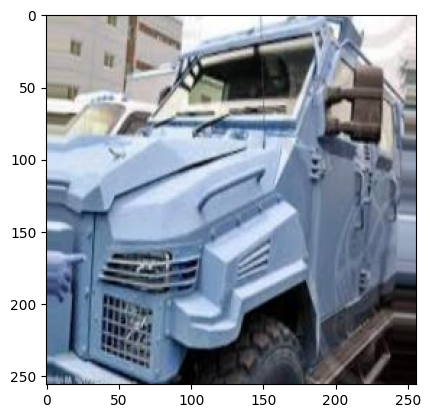

In [11]:
index = 90
plt.imshow(X_train[index])
print("Clase: ", y_train[index])

In [12]:
m_train = len(y_train)
m_test = len(y_test)
num_p_x = len(X_train[0])

print("Numero de ejemplos de entrenamiento: ", m_train)
print("Numero de ejemplos de prueba: ", m_test)
print("Numero de pixeles: ", num_p_x)
print("Tamaño de cada imagen: ", X_train[0].shape)
print("Tamaño de datos de entrenamiento: ", X_train.shape) 
print("Tamaño de datos de prueba: ", X_test.shape)

Numero de ejemplos de entrenamiento:  11170
Numero de ejemplos de prueba:  1415
Numero de pixeles:  256
Tamaño de cada imagen:  (256, 256, 3)
Tamaño de datos de entrenamiento:  (11170, 256, 256, 3)
Tamaño de datos de prueba:  (1415, 256, 256, 3)


In [13]:
train_set_X_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_X_flatten = X_test.reshape(X_test.shape[0], -1).T

print("Tamaño de datos de entrenamiento: ", train_set_X_flatten.shape)
print("Tamaño de datos de prueba: ", test_set_X_flatten.shape)

Tamaño de datos de entrenamiento:  (196608, 11170)
Tamaño de datos de prueba:  (196608, 1415)


In [14]:
# Estandarizamos los datos
train_set_X = train_set_X_flatten/255.
test_set_X = test_set_X_flatten/255.

# Forward And propagation

In [15]:
# definimos la funcion sigmoid
def sigmoid(x):
    '''
    :param x: numpy array n x m 
    :return: numpy array n x m
    '''
    return 1/(1 + np.exp(-x))

In [16]:
def initialize_parameters(dim):
    '''
    :param dim: tamaño de los parametros
    :return: diccionario con los parametros inicializados
    '''
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [17]:
def propagation(w, b, X, Y):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :return: 
    grad: diccionario de los gradientes de los pesos y el bias
    cost: costo de la regresion logistica
    '''
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    cost = -1/m * np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))
    
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grad = {"dw": dw, "db": db}
    
    return grad, cost

In [18]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :param num_iterations: numero de iteraciones
    :param learning_rate: tasa de aprendizaje
    :return: 
    params: diccionario de los parametros
    grads: diccionario de los gradientes
    costs: lista de los costos
    '''
    costs = []
    for i in range(num_iterations):
        grad, cost = propagation(w, b, X, Y)
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            print("Costo despues de iteracion %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs